# Group information

Names: Miguel Alessandro Mini Huambachano, Arthur Dionizio Martins da Silva


RAs: 176933, 250814

# **Machine Learning MC886/MO444 - Task \#2**: Model Selection for classification


### Objective:

To explore **Model Selection** techniques to select the best model and hyperparameters for a classification task.

#### **Dataset: Online Shoppers Purchasing Intention**

The dataset contains sessions of access to a website. Each user can have only one record for each year, in the case were the users were repeated.

Our classification objective is to determine when a given session will end with the user purchasing something.
This information is present in the "Revenue" column, which is our target.

Features and the corresponding descriptions:

- **Administrative**: Amount of times the user visited this type of page.
- **Administrative_Duration**: Time spent by the user visiting this type of page.
- **Informational**:  Amount of times the user visited this type of page.
- **Informational_Duration**: Time spent by the user visiting this type of page.
- **ProductRelated**:  Amount of times the user visited this type of page.
- **ProductRelated_Duration**: Time spent by the user visiting this type of page.
- **BounceRates**: The bounce rate is the percentage of visitors who enter the site from that page and then leave without triggering any other analytics action. This field contains the average bounce rate of the pages visited.
- **ExitRates**: The Exit rate is the percentage of visitors that exited the site on a specific page. This field contains the average bounce rate of the pages visited.
- **PageValues**: The page value is calculated by google analytics based on the values spent after visiting this page. This field contains the average page values of the pages visited.
- **SpecialDay**: The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
- **Month**: Month of the visit.
- **OperatingSystems**: The operating system used by the visitor. This field is coded as integer categories.
- **Browser**: The browser used by the visitor. This field is coded as integer categories.
- **Region**: The region where the user visited the site. This field is coded as integer categories.
- **TrafficType**: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct). This field is coded as integer categories.
- **VisitorType**: Visitor type as "New Visitor", "Returning Visitor", and "Other"
- **Weekend**: Boolean value indicating whether the date of the visit is a weekend day.
- **Revenue**: The target value, indicating where the visitor bought something (1) or did not bought anything (0).


**How to load the dataset**

Dataset folder link: [here](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

This is the same folder as in the previous task, you can check your google drive to be sure if you need to copy it again.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [39]:
# link with google drive
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "online_shoppers_intention_mod.csv" # Change this to be the correct path if you added the dataset in a different location
df = pd.read_csv(path)

/usr/lib/python3.10/threading.py:957: ResourceWarning:

unclosed file <_io.FileIO name=42 mode='wb' closefd=True>

/usr/lib/python3.10/threading.py:957: ResourceWarning:

unclosed file <_io.FileIO name=43 mode='rb' closefd=True>

sys:1: ResourceWarning:

Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7de1eddc6ce0>



Mounted at /content/gdrive


### **Data analysis and preprocessing** (1.5 points)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Revenue`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think can help in understanding the dataset.

As in the previous task, preprocess the data, transform the categorical features with OneHotEncoding, and remember to scale continuous features to be in a similar scale between each other.


**We´ll start our preprocessing by defining which columns will be treated as features (independent variables) and which column will be treated as the target (dependent variable). Notice that, for our features, we´re going to have 2 subdivisions of them: the numerical columns and the categorical ones.**

In [40]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import RidgeClassifier, Lasso, Ridge
from sklearn.model_selection import cross_val_predict


target = 'Revenue'

numeric_columns = ['Administrative', 'Administrative_Duration', 'Informational',
                   'Informational_Duration', 'ProductRelated',
                   'ProductRelated_Duration', 'BounceRates', 'ExitRates',
                   'PageValues', 'SpecialDay']

categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region',
                       'TrafficType', 'VisitorType', 'Weekend']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Now, we´re going to split our dataset into training and testing sets, designing 70% of the dataset for training and 30% for testing.**

In [41]:
X = df.drop(target, axis=1).copy()
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
train = pd.concat([X_train, y_train], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [43]:
train.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8077,0,0.0,0,0.0,5,81.083333,0.04,0.050000,0.0,0.0,Dec,3,2,1,2,New_Visitor,False,0
1568,0,0.0,0,0.0,3,189.000000,0.00,0.066667,0.0,0.0,Mar,3,2,8,1,Returning_Visitor,False,0
462,0,0.0,1,132.0,8,445.000000,0.00,0.014286,0.0,0.0,Mar,3,2,4,14,Returning_Visitor,True,0
743,0,0.0,0,0.0,3,0.000000,0.20,0.200000,0.0,0.0,Mar,1,8,2,1,Returning_Visitor,False,0
222,0,0.0,0,0.0,4,14.000000,0.10,0.150000,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8631 entries, 8077 to 7270
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8631 non-null   int64  
 1   Administrative_Duration  8631 non-null   float64
 2   Informational            8631 non-null   int64  
 3   Informational_Duration   8631 non-null   float64
 4   ProductRelated           8631 non-null   int64  
 5   ProductRelated_Duration  8631 non-null   float64
 6   BounceRates              8631 non-null   float64
 7   ExitRates                8631 non-null   float64
 8   PageValues               8631 non-null   float64
 9   SpecialDay               8631 non-null   float64
 10  Month                    8631 non-null   object 
 11  OperatingSystems         8631 non-null   int64  
 12  Browser                  8631 non-null   int64  
 13  Region                   8631 non-null   int64  
 14  TrafficType              8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [45]:
train.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,2.302398,80.509877,0.508748,34.314914,31.697718,1195.706056,0.021485,0.042400,5.931044,0.059761,2.116672,2.357201,3.149345,4.073224,0.154443
std,3.291140,173.090680,1.280891,135.652626,44.379155,1828.486623,0.047272,0.047634,18.839500,0.196143,0.902649,1.717329,2.408908,4.023450,0.361394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,186.475000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.625000,0.000000,0.000000,18.000000,602.883333,0.003030,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,91.950000,0.000000,0.000000,37.000000,1477.564759,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,2720.500000,24.000000,2195.300000,705.000000,43171.233380,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [46]:
train.describe(include=['object'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Month,VisitorType
count,8631,8631
unique,10,3
top,May,Returning_Visitor
freq,2308,7389


In [47]:
train['Revenue'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Revenue
0    7298
1    1333
Name: count, dtype: int64

**Below, a histogram for each of our numerical features is created, so we can visualize their distributions.**

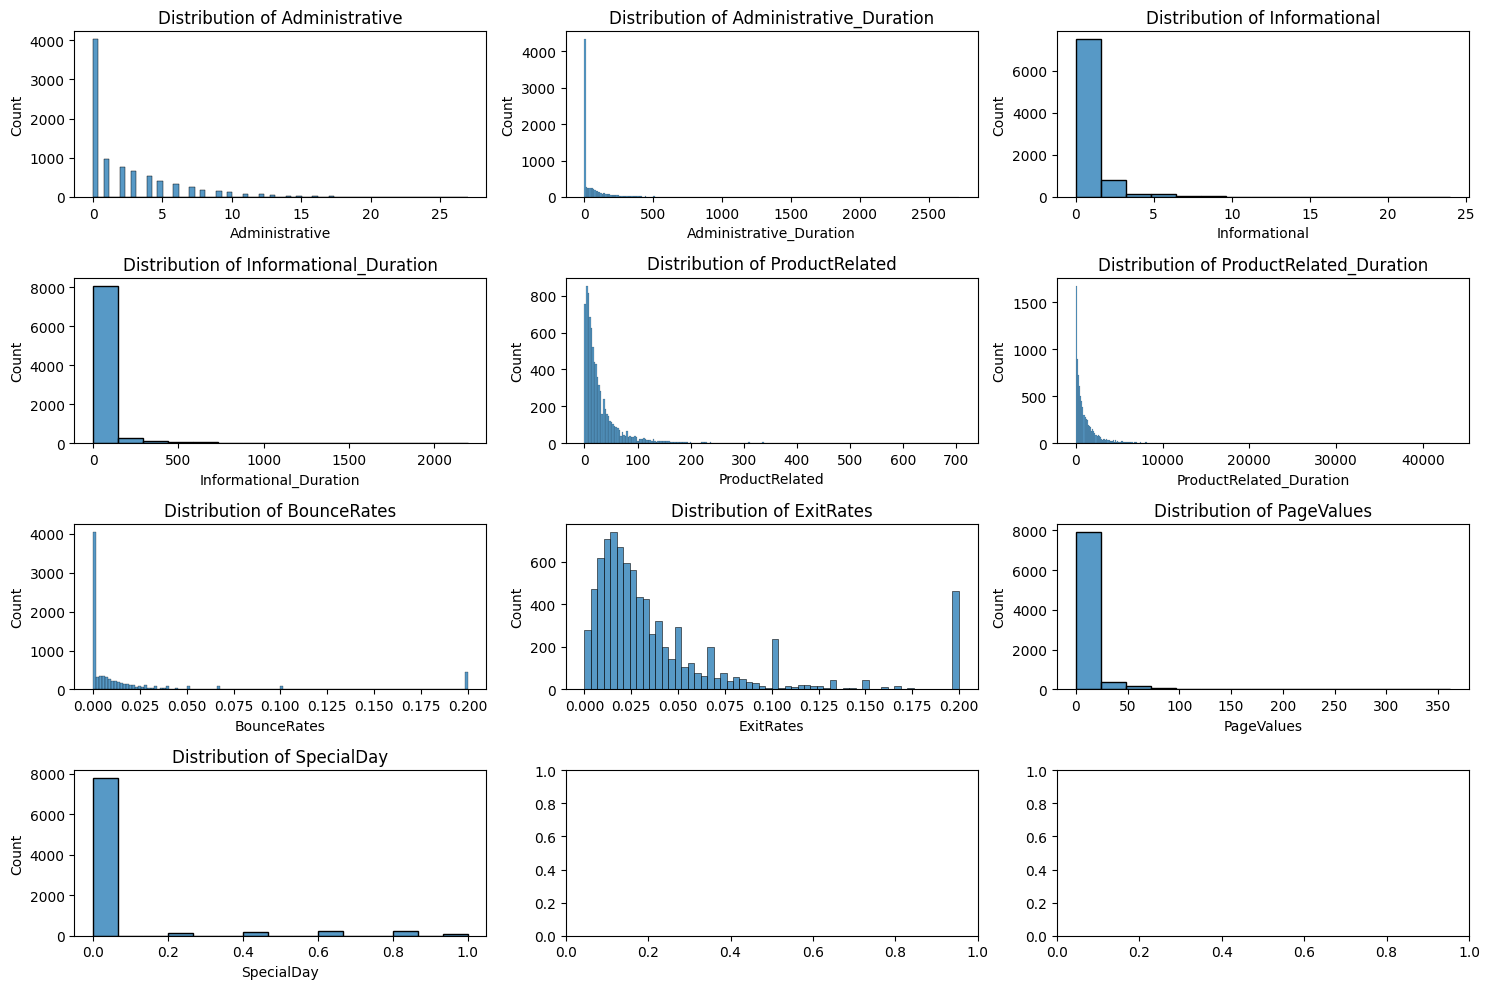

In [48]:
num_plots = len(numeric_columns)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(train[column], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

**Now, we generate a grid of boxplots to see the relationship between the numeric features and our target variable 'Revenue'. Firstly, we calculate the number of plots needed. Then, we determine the layout for subplots based on the number of numeric columns. We iterate over each numeric column and create a boxplot in its corresponding position in the grid. Finally, we adjust the layout of the grid.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



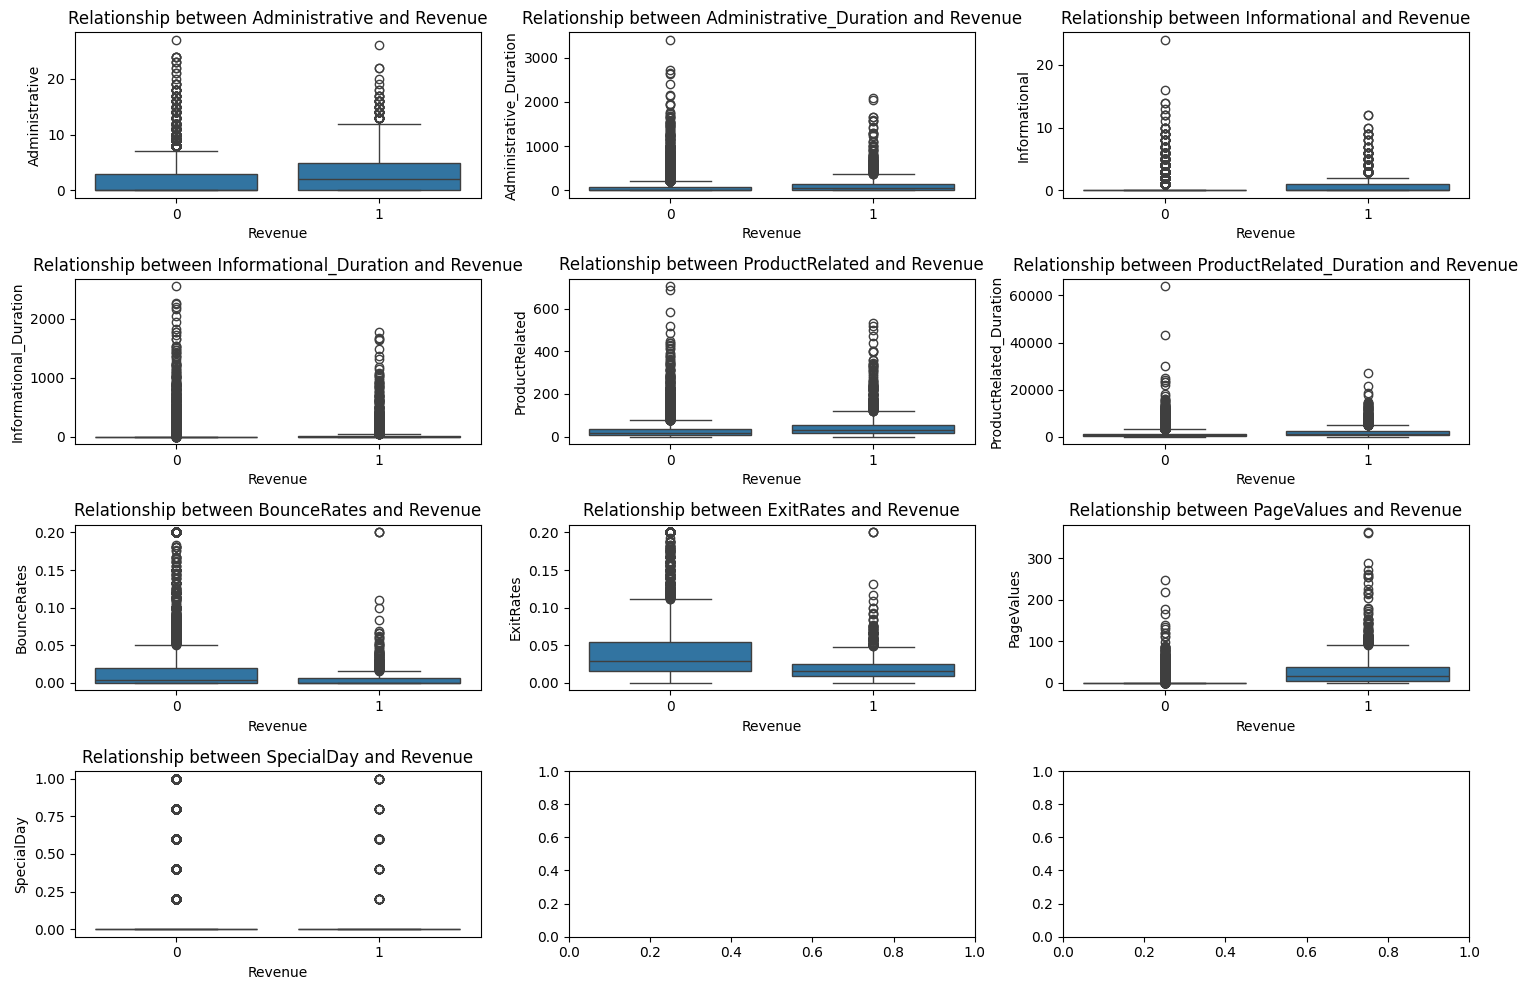

In [49]:
num_plots = len(numeric_columns)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x='Revenue', y=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Relationship between {column} and Revenue')

plt.tight_layout()
plt.show()

**Now, similarly, we are going to create countplots to understand the relationship between our target variable and the categorical features.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



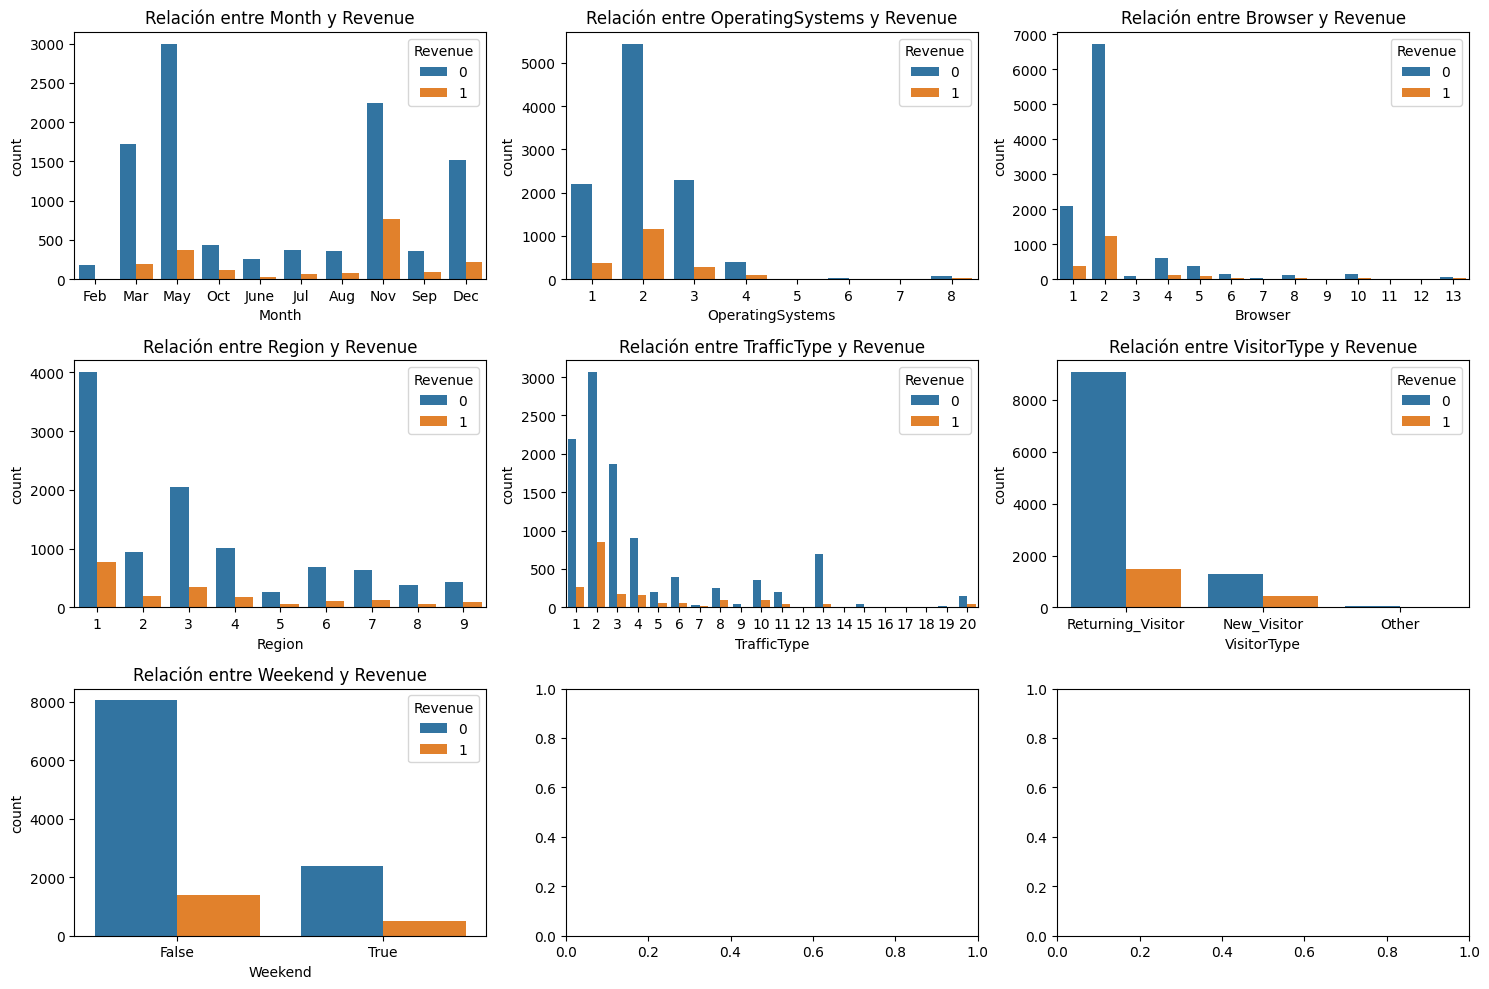

In [50]:
num_plots = len(categorical_columns)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=column, hue='Revenue', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Relationship between {column} and Revenue')

plt.tight_layout()
plt.show()


**Now, what is done is to preprocess our features dataframe by applying one-hot encoding to categorical features and Min-Max scaling to numeric features. In the end, we get a combined dataframe with all the transformed features.**

In [51]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ])

X_processed = preprocessor.fit_transform(X)

encoded_column_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(input_features=categorical_columns)
numeric_df = pd.DataFrame(X_processed.toarray()[:, len(encoded_column_names):], columns=numeric_columns)
categorical_df = pd.DataFrame(X_processed.toarray()[:, :len(encoded_column_names)], columns=list(encoded_column_names))

X_processed_df = pd.concat([categorical_df, numeric_df], axis=1)
print(X_processed_df.head())

   Month_Aug  Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  \
0        0.0        0.0        1.0        0.0         0.0        0.0   
1        0.0        0.0        1.0        0.0         0.0        0.0   
2        0.0        0.0        1.0        0.0         0.0        0.0   
3        0.0        0.0        1.0        0.0         0.0        0.0   
4        0.0        0.0        1.0        0.0         0.0        0.0   

   Month_May  Month_Nov  Month_Oct  Month_Sep  ...  Administrative  \
0        0.0        0.0        0.0        0.0  ...             0.0   
1        0.0        0.0        0.0        0.0  ...             0.0   
2        0.0        0.0        0.0        0.0  ...             0.0   
3        0.0        0.0        0.0        0.0  ...             0.0   
4        0.0        0.0        0.0        0.0  ...             0.0   

   Administrative_Duration  Informational  Informational_Duration  \
0                      0.0            0.0                     0.0   
1       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [53]:
X_train.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,...,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
1785,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.009929,0.001485,0.071429,0.309524,0.000000,0.0
10407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.074074,0.004119,0.000000,0.000000,0.114894,0.022539,0.012346,0.069665,0.007656,0.0
286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.001418,0.000000,1.000000,1.000000,0.000000,0.0
6520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.185185,0.014476,0.166667,0.148664,0.007092,0.001166,0.000000,0.090909,0.023017,0.0
12251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.041667,0.001961,0.012766,0.004361,0.200000,0.208333,0.000000,0.0


### **Metric selection** (0.5 point)

As we're working with unbalanced data, the accuracy metric is not a good indicator of performance. Choose a metric and explain why that metric is a good fit for the online shopping intention problem. You don't need to implement the metric, only discuss it.

*Tip: Some common metrics are [balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)*.

1. A precisão equilibrada: mede os verdadeiros positivos (Sensibilidade) mais os verdadeiros negativos (Especificidade), considerando a média aritmética desses dois valores. Embora dê a mesma importância para as não compras que para as compras, pode haver usuários sem compras que não têm um comportamento relevante.

2. Recall: quantidade de acertos positivos, pode ser enganoso porque o problema é desbalanceado e não considera pesos.

3. Precisão: quantidade de acertos positivos, pode ser útil, mas, da mesma forma, como é desbalanceado, pode ter apenas acertos positivos e teríamos um viés.

4. F1-score: combina recall e precisão, é bom para modelos desbalanceados, pois observa dois valores ao mesmo tempo. Lembramos também que não identifica os verdadeiros negativos e dá mais interesse às previsões verdadeiras, já que não estamos interessados em nos concentrar nos negativos, sendo um bom identificador.

5. AUC: Considero que é uma boa métrica para medir a proporção de acertos e não se preocupa com as proporções finais, embora deva ser acompanhada por outra métrica, já que o problema tem um alvo desequilibrado e, em segundo lugar, os valores não estão muito distantes de 1 ou 0, ou seja, são binários de acordo com o boxplot.

**It can be noticed that we also have got unbalanced classes. This happens when one class dominates the dataset and prevails over the remaining classes. In our case, we have way more 0 instances than 1 instances. This situation requires special attention to ensure that our model doesn't simply predict the majority class all the time, avoiding to produce biased predictions.**

**It is vital to choose our metric with that in mind, since there are more adequate metrics for unbalanced classes because they are more robust to it, while there are other metrics that shouldn´t be chosen in such cases.**

**The metric we´re going for is the f1-score, and we will explain the reason below.**

 **The f1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, especially when dealing with unbalanced classes. **
 **Precision focuses on the correctness of positive predictions, while recall emphasizes capturing all relevant instances.**

**Having in mind that our problem has significant imbalance, we do not want to make a classification of pure falsehoods. On the other hand, we are more interested in classifying the true ones and identifying potential buyers. Additionally, we believe that there may be occasional non-buyers whom we do not want to identify.**

 **Besides that, we know that f1-score is perfect when we want to consider both false positives and false negatives in a single metric.**
 **This is exactly our case, since our objective here is to determine when a given session will end with the user purchasing something. Thus, we´re going to use the f1-score metric.**

### **Feature selection** (2 points)

As seen in class, there are different ways to select which features to use in a machine learning model.

You should implement the "Forward stepwise selection" technique to find the best `p` features to be used in this task according to that method.

Use the [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model and the **K-fold cross-validation** as optimality criterion. You can use the Scikit-learn library, which has helper functions to create the [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) logic and the model. The metric used in K-fold should be the one chosen in the previous section!

Remember to save a new dataframe only with the selected features for the next steps! Also, use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data on the final part of the whole task.

In [54]:
selected_features = []
features_not_selected = list(X_train.columns)
best_score = 0
k_folds = 5

while True:
    best_feature = None

    for feature in features_not_selected:
        current_features = selected_features + [feature]
        model = LogisticRegression()

        kf = KFold(n_splits=k_folds)
        scores = []
        for train_index, test_index in kf.split(X_train):
            X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]

            model.fit(X_train_kf[current_features], y_train_kf)

            y_pred = model.predict(X_test_kf[current_features])
            score = f1_score(y_test_kf, y_pred)
            scores.append(score)

        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_feature = feature

    if best_feature is None:
        break

    selected_features.append(best_feature)
    features_not_selected.remove(best_feature)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

final_model = LogisticRegression()
final_model.fit(X_train_selected, y_train)
y_pred_test = final_model.predict(X_test_selected)
test_score = f1_score(y_test, y_pred_test)
print("Selected features:", selected_features)
print("Test F1-score:", test_score)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Selected features: ['PageValues', 'ExitRates', 'OperatingSystems_3', 'Month_May', 'Month_Feb', 'SpecialDay', 'BounceRates', 'VisitorType_Other', 'TrafficType_16']
Test F1-score: 0.38376383763837635


In [55]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9864 entries, 1785 to 7270
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PageValues          9864 non-null   float64
 1   ExitRates           9864 non-null   float64
 2   OperatingSystems_3  9864 non-null   float64
 3   Month_May           9864 non-null   float64
 4   Month_Feb           9864 non-null   float64
 5   SpecialDay          9864 non-null   float64
 6   BounceRates         9864 non-null   float64
 7   VisitorType_Other   9864 non-null   float64
 8   TrafficType_16      9864 non-null   float64
dtypes: float64(9)
memory usage: 770.6 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [56]:
X_train_selected.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,PageValues,ExitRates,OperatingSystems_3,Month_May,Month_Feb,SpecialDay,BounceRates,VisitorType_Other,TrafficType_16
count,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000
mean,0.016124,0.213067,0.203974,0.269972,0.013990,0.061071,0.108295,0.007603,0.000304
std,0.051093,0.239193,0.402970,0.443967,0.117456,0.198057,0.237343,0.086870,0.017438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.014805,0.000000,0.000000
75%,0.000000,0.250000,0.000000,1.000000,0.000000,0.000000,0.083333,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Model selection** (4 points)

This is the main section of the task. Using the features selected in the previous section, you should do a [**Grid search** with K-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to select the best classification model and its hyperparameters for this task. You can do it by hand if you want (you will need to do a nested loop for each tested parameter to have all combinations).

Remember to use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data.

You should train and validate the following models:
- [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)
- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

As the Lasso model do not predict classes, you would need to convert the results to classes, and execute a GridSearch by hand. Alternatively, you can use only the Logistic regression model and test the regularization parameters ('l1' for Lasso regularization and 'l2' for Ridge) and show the best hyperparemeters when using each regularization. Remember to change the "C" parameter (the smaller the C, the stronger is the regularization).

Explore the documentation above and select which hyperparameters to vary, besides the regularization ones.

Also, you should test the polynomial transformation to find possible nonlinear relations between the features of the dataset. **Do not** use values above "3" for the `degree` of the polynomial transformation, as the number of features increases exponentially.

In short, you should use GridSearchCV (that uses K-fold internally) to get the best hyperparameters for the model using different regularization parameters, while also testing the polynomial transformation.

*Note: you will need to use the `fit` method more than once to test the different dataset transformations. Choose wisely which hyperparameters to test, as the GridSearch will test all combinations and can take very a long time to finish.*

In [57]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

logistic_params = {
    'model__penalty': [None],
    'model__max_iter': [500, 1000],
    'model__solver': ['lbfgs', 'liblinear']
}

ridge_params = {
    'model__C': [0.001, 0.1, 1, 10, 100],
    'model__penalty': ['l2'],
    'model__max_iter': [500, 1000],
    'model__solver': ['lbfgs', 'liblinear']
}

lasso_params = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1'],
    'model__max_iter': [500, 1000],
    'model__solver': ['saga', 'liblinear']
}

poly_logistic_params = {
    'poly__degree': [2, 3],
    'model__penalty': [None],
    'model__max_iter': [1000, 2000],
    'model__solver': ['saga']
}

poly_ridge_params = {
    'poly__degree': [2, 3],
    'model__C': [0.001, 0.1, 1, 10, 100],
    'model__penalty': ['l2'],
    'model__max_iter': [5000, 3000],
    'model__solver': ['liblinear']
}

poly_lasso_params = {
    'poly__degree': [2, 3],
    'model__C': [0.001, 0.1, 1, 10, 100],
    'model__penalty': ['l1'],
    'model__max_iter': [2000, 3000],
    'model__solver': ['liblinear']
}


logistic_pipeline = Pipeline([('model', LogisticRegression())])

poly_logistic_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', LogisticRegression())
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
import warnings
warnings.filterwarnings("ignore")
logistic_grid = GridSearchCV(logistic_pipeline, logistic_params, cv=kf, scoring='f1')
logistic_grid.fit(X_train_selected, y_train)
warnings.resetwarnings()

ridge_grid = GridSearchCV(logistic_pipeline, ridge_params, cv=kf, scoring='f1')
ridge_grid.fit(X_train_selected, y_train)

lasso_grid = GridSearchCV(logistic_pipeline, lasso_params, cv=kf, scoring='f1')
lasso_grid.fit(X_train_selected, y_train)

print("complete")

complete


In [59]:
print("Best Logistic Regression parameters:", logistic_grid.best_params_)
print("Best Logistic Regression score:", logistic_grid.best_score_)
print("Best Ridge Classifier parameters:", ridge_grid.best_params_)
print("Best Ridge Classifier score:", ridge_grid.best_score_)
print("Best Lasso parameters:", lasso_grid.best_params_)
print("Best Lasso score:", lasso_grid.best_score_)


Best Logistic Regression parameters: {'model__max_iter': 500, 'model__penalty': None, 'model__solver': 'lbfgs'}
Best Logistic Regression score: 0.49797592515987377
Best Ridge Classifier parameters: {'model__C': 100, 'model__max_iter': 500, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best Ridge Classifier score: 0.49598372387415707
Best Lasso parameters: {'model__C': 10, 'model__max_iter': 500, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best Lasso score: 0.49863939110437505


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [60]:
import warnings
warnings.filterwarnings("ignore")
poly_logistic_grid = GridSearchCV(poly_logistic_pipeline, poly_logistic_params, cv=kf, scoring='f1')
poly_logistic_grid.fit(X_train_selected, y_train)
warnings.resetwarnings()

poly_ridge_grid = GridSearchCV(poly_logistic_pipeline, poly_ridge_params, cv=kf, scoring='f1')
poly_ridge_grid.fit(X_train_selected, y_train)

poly_lasso_grid = GridSearchCV(poly_logistic_pipeline, poly_lasso_params, cv=kf, scoring='f1')
poly_lasso_grid.fit(X_train_selected, y_train)

print("complete")

complete


In [61]:
print("with polynomial features:")
print("Best Logistic Regression parameters:", poly_logistic_grid.best_params_)
print("Best Logistic Regression score:", poly_logistic_grid.best_score_)
print("Best Ridge Classifier parameters:", poly_ridge_grid.best_params_)
print("Best Ridge Classifier score:", poly_ridge_grid.best_score_)
print("Best Lasso parameters:", poly_lasso_grid.best_params_)
print("Best Lasso score:", poly_lasso_grid.best_score_)

with polynomial features:
Best Logistic Regression parameters: {'model__max_iter': 2000, 'model__penalty': None, 'model__solver': 'saga', 'poly__degree': 3}
Best Logistic Regression score: 0.5307181388651985
Best Ridge Classifier parameters: {'model__C': 100, 'model__max_iter': 5000, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'poly__degree': 3}
Best Ridge Classifier score: 0.527512913282657
Best Lasso parameters: {'model__C': 100, 'model__max_iter': 3000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'poly__degree': 3}
Best Lasso score: 0.5778316665082729


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### Discussion of key points

- What was the best model hyperparemeters, according to cross validation?
- The models that use regularization were able to outperform the Logistic Regression without it? Explain why.


1. **It is clear that the best results were achieved with relatively large values for the regularization hyperparameter C, both for models with polynomial features and for those without polynomial features. Besides that, we can see that the polynomial models got better results, reaching a maximum f1-score of 58%.**

2. **It seems that the model is nonlinear, since there was an improvement in the results when switching to a degree 3 model. The polynomial features expand the model's capacity to represent complex relationships in the data once it allows the model to capture higher-order interactions between the features.**

  **On the other hand, the value of C for the model is relatively large, which implies that there are more non-zero active variables in the model and more space for beta values, meaning more flexibility in capturing the underlying patterns in the data.**

  **All of this implies that the variance is higher and the bias is lower, revealing the tendence of capturing more intricate patterns at the expense of potentially increased variability in predictions. These observations makes sense with the graphical analysis of the numerical variables conducted earlier.**

### Threshold testing (1 point)

The three models trained in the previous session can return the probabilities of a sample being of the positive class.
The default threshold used to convert the results to the desired 0 or 1 output is `0.5`.

Use the K-fold cross validation to test different thresholds with the best models trained in the previous section (remember to train the best models with all train data and the best hyperparameters).

*If the model does not output probabilities, look for the `predic_proba` method*.

In [62]:

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

best_models_trained = {
    "Logistic Regression": logistic_grid.best_estimator_,
    "Ridge": ridge_grid.best_estimator_,
    "Lasso": lasso_grid.best_estimator_,
    "Polynomial Logistic Regression": poly_logistic_grid.best_estimator_,
    "Polynomial Ridge": poly_ridge_grid.best_estimator_,
    "Polynomial Lasso": poly_lasso_grid.best_estimator_
}

for model_name, model in best_models_trained.items():

    probabilities = cross_val_predict(model, X_train_selected, y_train, cv=kf, method='predict_proba')[:, 1]

    print("---------------------")
    for threshold in thresholds:
        y_pred_threshold = (probabilities >= threshold).astype(int)
        f1 = f1_score(y_train, y_pred_threshold)
        print(f"Model: {model_name}, Threshold: {threshold}, F1-score: {f1}")


---------------------
Model: Logistic Regression, Threshold: 0.1, F1-score: 0.4389132910362779
Model: Logistic Regression, Threshold: 0.2, F1-score: 0.6424905918576804
Model: Logistic Regression, Threshold: 0.3, F1-score: 0.5937136204889406
Model: Logistic Regression, Threshold: 0.4, F1-score: 0.5463786531130876
Model: Logistic Regression, Threshold: 0.5, F1-score: 0.4981981981981982
Model: Logistic Regression, Threshold: 0.6, F1-score: 0.461756373937677
Model: Logistic Regression, Threshold: 0.7, F1-score: 0.4159684573681617
---------------------
Model: Ridge, Threshold: 0.1, F1-score: 0.4381384790011351
Model: Ridge, Threshold: 0.2, F1-score: 0.6420260095824778
Model: Ridge, Threshold: 0.3, F1-score: 0.5923047026816944
Model: Ridge, Threshold: 0.4, F1-score: 0.5447602885023335
Model: Ridge, Threshold: 0.5, F1-score: 0.49615906009941263
Model: Ridge, Threshold: 0.6, F1-score: 0.459280303030303
Model: Ridge, Threshold: 0.7, F1-score: 0.4120553359683795
---------------------
Model: Lass

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



---------------------
Model: Polynomial Logistic Regression, Threshold: 0.1, F1-score: 0.43457189014539577
Model: Polynomial Logistic Regression, Threshold: 0.2, F1-score: 0.654037886340977
Model: Polynomial Logistic Regression, Threshold: 0.3, F1-score: 0.6117120477433793
Model: Polynomial Logistic Regression, Threshold: 0.4, F1-score: 0.5733870967741935
Model: Polynomial Logistic Regression, Threshold: 0.5, F1-score: 0.5314806773773338
Model: Polynomial Logistic Regression, Threshold: 0.6, F1-score: 0.48758049678012877
Model: Polynomial Logistic Regression, Threshold: 0.7, F1-score: 0.4388593523441276
---------------------
Model: Polynomial Ridge, Threshold: 0.1, F1-score: 0.43486682808716715
Model: Polynomial Ridge, Threshold: 0.2, F1-score: 0.653156146179402
Model: Polynomial Ridge, Threshold: 0.3, F1-score: 0.6114221724524076
Model: Polynomial Ridge, Threshold: 0.4, F1-score: 0.5705024311183144
Model: Polynomial Ridge, Threshold: 0.5, F1-score: 0.5281045751633987
Model: Polynomial

**Above, we can see that the best performance of each model were:**


*   **Logistic Regression:**

  Threshold: 0.2

  F1-score: 0.6424905918576804

*   **Ridge/Lasso:**

  Threshold: 0.2

  F1-score: 0.6420260095824778

*   **Polynomial Logistic Regression:**

  Threshold: 0.2

  F1-score: 0.654037886340977

*   **Polynomial Ridge:**

  Threshold: 0.2

  F1-score: 0.653156146179402

*   **Polynomial Lasso:**

  Threshold: 0.2

  F1-score: 0.6578523057078363

**So, we can see that the best model was the Polynomial Lasso one with a threshold of 0.2**

### Visualizing/interpreting weights (0.5 point)

As we're dealing with models that apply regularization terms, it's relatively easy to verify those results on the coefficient weights of the trained models.

Use the function below to visualize the weights of the final models.</br>
Also, train the three models again using *all* original features, and use the function below to compare how the weight distribution behaves on each of the models*.

\* *If no features were removed in previous sections, just compare the models with and without regularization*

In [63]:
## You don't need to change this cell!
import plotly.express as px

def plot_weights(clf, columns):
  '''
  Plot the weights of the model for each column in an interative graph.
  "model" should be an sklearn model or follow the same interface, having the "coef_" attribute with the weights.

  -----
  Examples:
  plot_weights(classifier, X.columns)
  # for polynomial transformations
  plot_weights(classifier, poly.get_feature_names_out(X.columns))

  '''
  #if not hasattr(clf, 'coef_'):
  #  print("Invalid model!")
  #  return

  df_plot = pd.DataFrame(columns=['weight','columns'])
  df_plot['columns']= columns

  if len(columns) == len(clf.coef_):
    df_plot['weight']=clf.coef_
  else:
    df_plot['weight']=clf.coef_[0]

  fig = px.bar(df_plot, x='columns', y='weight', color='weight')
  fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [64]:
plot_weights(logistic_grid.best_estimator_.named_steps['model'], list(X_train_selected.columns))

In [65]:
plot_weights(ridge_grid.best_estimator_.named_steps['model'], list(X_train_selected.columns))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [66]:
plot_weights(lasso_grid.best_estimator_.named_steps['model'], list(X_train_selected.columns))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [67]:
poly = PolynomialFeatures(degree=3)
poly.fit(X_train_selected)
plot_weights(poly_logistic_grid.best_estimator_.named_steps['model'], poly.get_feature_names_out(X_train_selected.columns))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [68]:
poly = PolynomialFeatures(degree=3)
poly.fit(X_train_selected)
plot_weights(poly_ridge_grid.best_estimator_.named_steps['model'], poly.get_feature_names_out(X_train_selected.columns))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [69]:
poly = PolynomialFeatures(degree=3)
poly.fit(X_train_selected)
plot_weights(poly_lasso_grid.best_estimator_.named_steps['model'], poly.get_feature_names_out(X_train_selected.columns))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Testing (0.5 point)

Finally, choose your **Best** model in validation, test it and plot the normalized confusion matrix.

**The best model, as seen earlier, was the Polynomial Lasso, which indicates that we have a non-linearity present.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



F1 Score: 0.5557206537890044


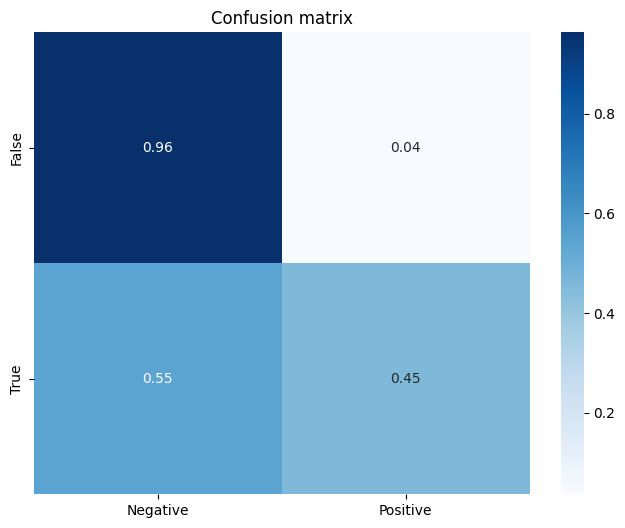

In [70]:
model = poly_lasso_grid.best_estimator_.named_steps['model']
model.threshold = 0.2
poly = PolynomialFeatures(degree=3)
X_test_poly = poly.fit_transform(X_test_selected)
y_pred = model.predict(X_test_poly)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
print("F1 Score:", f1)


labels = ["Negative", "Positive"]
labels2 = ["False", "True"]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt=".2f", xticklabels=labels, yticklabels=labels2)
plt.title("Confusion matrix")
plt.show()

#### Discussion of key points

- What conclusions can you have when looking at the different graphs?


**We observe that the linear logistic regression models, with and without regularization, do not show advantage; actually, we notice that the weights are identical and, especially, the hyperparameter C is large in regularized models, indicating a weaker regularization. This means, in other words, that the penalty for large parameter values is reduced, allowing the model to explore a larger solution space where coefficients can take on higher magnitudes.**

**This suggests that the model may be highly linear, as observed in the graphs. When analyzing the weights of the polynomial models, we notice a low or null contribution of the weights to most variables and, as expected, we see that Lasso has the ability to eliminate('zero out') variables, unlike Ridge, which still maintains some variables. Additionally, Lasso presents better performance in scoring and is simpler, giving the impression of having less noise.**

**On one hand, the model fails to correctly capture negative cases. However, on the other hand, by choosing to use the F1-score, we also commit to considering that it is better to assess true positives and focus on them. This has been reflected in the asymmetry on the positive side of the confusion matrix; In fact, it is easy to notice that the model has achieved better identification of true positives.**

## Deadline

Thursday, May 2, 11:59 pm.

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May ~(3)~ 6 11:59 pm : grade * 0.75
- May ~(4)~ 7, 11:59 pm : grade * 0.5
- May ~(5)~ 8, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English) or Google Colaboratory link (remember to share it!).

**This activity is NOT individual, it must be done in pairs (two-person group).**

Only one individual should deliver the notebook.